# 1. Getting VizDoom Up and Running

In [2]:
!pip install vizdoom

You should consider upgrading via the 'd:\youtube\26-05-2021 - vizdoom\vizdoom\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
!cd github & git clone https://github.com/mwydmuch/ViZDoom

fatal: destination path 'ViZDoom' already exists and is not an empty directory.


In [4]:
# Import vizdoom for game env
from vizdoom import * 
# Import random for action sampling
import random
# Import time for sleeping
import time 
# Import numpy for identity matrix
import numpy as np

In [6]:
# import os
# os.getcwd()

'C:\\Users\\Nicholas\\Desktop\\final-proj-cct\\vizdoom\\DoomReinforcementLearning-main\\DoomReinforcementLearning-main'

In [8]:
# os.chdir('./github')
# os.getcwd()

'C:\\Users\\Nicholas\\Desktop\\final-proj-cct\\vizdoom\\DoomReinforcementLearning-main\\DoomReinforcementLearning-main\\github'

In [11]:
# os.chdir('..')
# os.getcwd()

'C:\\Users\\Nicholas\\Desktop\\final-proj-cct\\vizdoom\\DoomReinforcementLearning-main\\DoomReinforcementLearning-main'

In [12]:
# Setup game
game = DoomGame()
game.load_config('github/VizDoom/scenarios/deadly_corridor_s5.cfg')
game.init()

In [13]:
# This is the set of actions we can take in the environment
actions = np.identity(7, dtype=np.uint8)

In [14]:
state = game.get_state()

In [15]:
state.game_variables

array([100.])

In [16]:
# Loop through episodes 
episodes = 10 
for episode in range(episodes): 
    # Create a new episode or game 
    game.new_episode()
    # Check the game isn't done 
    while not game.is_episode_finished(): 
        # Get the game state 
        state = game.get_state()
        # Get the game image 
        img = state.screen_buffer
        # Get the game variables - ammo
        info = state.game_variables
        # Take an action
        reward = game.make_action(random.choice(actions),4)
        # Print rewward 
        # print('reward:', reward) 
        time.sleep(0.02)
    print('Result:', game.get_total_reward())
    time.sleep(2)

Result: -113.57115173339844
Result: -68.36141967773438
Result: -56.10417175292969
Result: -21.345184326171875
Result: -64.63613891601562
Result: -95.69523620605469
Result: -57.18702697753906
Result: -97.36402893066406
Result: -109.25746154785156
Result: -57.615509033203125


In [17]:
#S1 - 336
#S2 - -29
#S3 - -20
#S4 - -95
#S5 - -99

In [18]:
game.close()

In [21]:
game.get_state().game_variables

AttributeError: 'NoneType' object has no attribute 'game_variables'

# 2. Converting it to a Gym Environment

In [22]:
!pip install gym

In [23]:
# Import environment base class from OpenAI Gym
from gym import Env
# Import gym spaces 
from gym.spaces import Discrete, Box
# Import opencv 
import cv2

In [26]:
# Create Vizdoom OpenAI Gym Environment
class VizDoomGym(Env): 
    # Function that is called when we start the env
    def __init__(self, render=False, config='github/VizDoom/scenarios/deadly_corridor_s1.cfg'): 
        # Inherit from Env
        super().__init__()
        # Setup the game 
        self.game = DoomGame()
        self.game.load_config(config)
        
        # Render frame logic
        if render == False: 
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        # Start the game 
        self.game.init()
        
        # Create the action space and observation space
        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) 
        self.action_space = Discrete(7)
        
        # Game variables: HEALTH DAMAGE_TAKEN HITCOUNT SELECTED_WEAPON_AMMO
        self.damage_taken = 0
        self.hitcount = 0
        self.ammo = 52 ## CHANGED
        
        
    # This is how we take a step in the environment
    def step(self, action):
        # Specify action and take step 
        actions = np.identity(7)
        movement_reward = self.game.make_action(actions[action], 4) 
        
        reward = 0 
        # Get all the other stuff we need to retun 
        if self.game.get_state(): 
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            
            # Reward shaping
            game_variables = self.game.get_state().game_variables
            health, damage_taken, hitcount, ammo = game_variables
            
            # Calculate reward deltas
            damage_taken_delta = -damage_taken + self.damage_taken
            self.damage_taken = damage_taken
            hitcount_delta = hitcount - self.hitcount
            self.hitcount = hitcount
            ammo_delta = ammo - self.ammo
            self.ammo = ammo
            
            reward = movement_reward + damage_taken_delta*10 + hitcount_delta*200  + ammo_delta*5 
            info = ammo
        else: 
            state = np.zeros(self.observation_space.shape)
            info = 0 
        
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        return state, reward, done, info 
    
    # Define how to render the game or environment 
    def render(): 
        pass
    
    # What happens when we start a new game 
    def reset(self): 
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    # Grayscale the game frame and resize it 
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
    
    # Call to close down the game
    def close(self): 
        self.game.close()

In [28]:
env.close()

NameError: name 'env' is not defined

In [29]:
env = VizDoomGym(render=True)

In [30]:
res = env.step(5)
res[1]

0.0

In [31]:
res[1]

0.0

In [32]:
state = env.reset()

# 3. View Game State

In [33]:
env.reset()

array([[[32],
        [33],
        [25],
        ...,
        [27],
        [23],
        [24]],

       [[27],
        [33],
        [23],
        ...,
        [24],
        [24],
        [24]],

       [[20],
        [35],
        [23],
        ...,
        [24],
        [24],
        [24]],

       ...,

       [[75],
        [63],
        [62],
        ...,
        [44],
        [71],
        [60]],

       [[15],
        [48],
        [47],
        ...,
        [49],
        [69],
        [47]],

       [[22],
        [14],
        [26],
        ...,
        [57],
        [37],
        [39]]], dtype=uint8)

In [34]:
# Import Environment checker
from stable_baselines3.common import env_checker

In [35]:
env_checker.check_env(env)

# 3. View State

In [36]:
!pip install matplotlib

In [37]:
from matplotlib import pyplot as plt

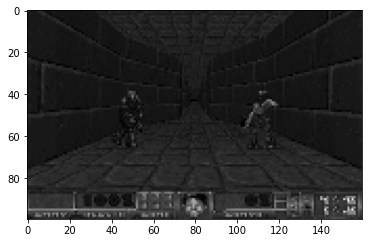

In [38]:
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

In [39]:
env.close()

# 4. Setup Callback

In [40]:
!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 171, in _merge_into_criterion
    crit = self.state.criteria[name]
KeyError: 'torch'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 189, in _main
    status = self.run(options, args)
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 178, in wrapper
    return func(self, options, args)
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 316, in run
    requirement_set = resolver.resolve(
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 121, in resolve
    self._result = resolver.resolve(
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\pip\


  File "C:\Users\Nicholas\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 144, in __init__
    self.dist = self._prepare()
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 226, in _prepare
    dist = self._prepare_distribution()
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 311, in _prepare_distribution
    return self._factory.preparer.prepare_linked_requirement(
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\pip\_internal\operations\prepare.py", line 457, in prepare_linked_requirement
    return self._prepare_linked_requirement(req, parallel_builds)
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\pip\_internal\operations\prepare.py", line 480, in _prepare_linked_requirement
    local_file = unpack_url(
  File "C:\Users\Nicholas\anaconda3\lib\site-packages\pip\_internal\operations\prepare.py", line 230, in unp

In [41]:
!pip install stable-baselines3[extra]

  Created wheel for atari-py: filename=atari_py-0.2.6-cp38-cp38-win_amd64.whl size=1155035 sha256=636231c6f5100176a92a9831736d97eb2948f7f0604223f6f3d751ea093c27f9
  Stored in directory: c:\users\nicholas\appdata\local\pip\cache\wheels\7f\5e\27\2e90b9887063d82ee2f9f8b2f8db76bb2290aa281dc40449c8
Successfully built atari-py


Reason for being yanked: re-release with new wheels


In [42]:
# Import os for file nav
import os 
# Import callback class from sb3
from stable_baselines3.common.callbacks import BaseCallback

In [43]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [44]:
CHECKPOINT_DIR = './train/train_corridor'
LOG_DIR = './logs/log_corridor'

In [45]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

# 5. Train Our Model Using Curriculum 

In [46]:
# import ppo for training
from stable_baselines3 import PPO

In [47]:
# Non rendered environment
env = VizDoomGym(config='github/VizDoom/scenarios/deadly_corridor_s1.cfg')

# Changes made
- Effects of hyperparameter tuning
- Increased initial timestep length

## Possibly look into
- Changing reward function and game variables due to bug

In [48]:
#model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=4096)
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.00001, n_steps=8192, clip_range=.1, gamma=.95, gae_lambda=.9)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [49]:
#model.learn(total_timesteps=40000, callback=callback)
model.learn(total_timesteps=400000, callback=callback)

Logging to ./logs/log_corridor\PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 204      |
|    ep_rew_mean     | 69       |
| time/              |          |
|    fps             | 40       |
|    iterations      | 1        |
|    time_elapsed    | 203      |
|    total_timesteps | 8192     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 193          |
|    ep_rew_mean          | 103          |
| time/                   |              |
|    fps                  | 17           |
|    iterations           | 2            |
|    time_elapsed         | 929          |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 0.0032240306 |
|    clip_fraction        | 0.121        |
|    clip_range           | 0.1          |
|    entropy_loss         | -1.94        |
|    explained_varian

KeyboardInterrupt: 

In [14]:
model.load('./train/train_corridor_test/best_model_260000.zip')

In [ ]:
env = VizDoomGym(config='github/VizDoom/scenarios/deadly_corridor_s2.cfg')
model.set_env(env)
model.learn(total_timesteps=40000, callback=callback)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Logging to ./logs/log_corridor\PPO_32
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 77.5     |
|    ep_rew_mean     | 43.8     |
| time/              |          |
|    fps             | 42       |
|    iterations      | 1        |
|    time_elapsed    | 192      |
|    total_timesteps | 8192     |
---------------------------------


In [ ]:
env = VizDoomGym(config='github/VizDoom/scenarios/deadly_corridor_s3.cfg')
model.set_env(env)
model.learn(total_timesteps=40000, callback=callback)

In [ ]:
env = VizDoomGym(config='github/VizDoom/scenarios/deadly_corridor_s4.cfg')
model.set_env(env)
model.learn(total_timesteps=40000, callback=callback)

In [ ]:
env = VizDoomGym(config='github/VizDoom/scenarios/deadly_corridor_s5.cfg')
model.set_env(env)
model.learn(total_timesteps=40000, callback=callback)

# 6. Test the Model

In [4]:
# Import eval policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

In [30]:
# Reload model from disc
model = PPO.load('./archive_train/train/train_corridor/best_model_560000')

In [43]:
# Create rendered environment
env = VizDoomGym(render=True, config='github/VizDoom/scenarios/deadly_corridor_s1.cfg')

In [124]:
# Evaluate mean reward for 10 games
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=10)

D:\YouTube\26-05-2021 - Vizdoom\vizdoom\lib\site-packages\stable_baselines3\common\evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


In [46]:
for episode in range(20): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        time.sleep(0.02)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(total_reward, episode))
    time.sleep(2)

Total Reward for episode 1028.1819915771484 is 0
Total Reward for episode 2453.253128051758 is 1
Total Reward for episode 682.4454345703125 is 2
Total Reward for episode 406.0699768066406 is 3
Total Reward for episode 1458.8362579345703 is 4
Total Reward for episode -33.761932373046875 is 5
Total Reward for episode 2656.292770385742 is 6
Total Reward for episode -706.5568542480469 is 7
Total Reward for episode 369.5380096435547 is 8
Total Reward for episode 273.89292907714844 is 9
Total Reward for episode 2972.891387939453 is 10


KeyboardInterrupt: 